# DATA ANALYSIS PROJECT

# PROJECT : DATA ANALYSIS ON DOCTORSVISIT DATASET

# Before executing this project your environment must have certain libraries
!pip install openpyxl<br>
!pip install plotly<br>
!pip install --upgrade seaborn(seaborn should be 0.12.2 version)



# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing

In [2]:

import pandas as pd

# Make sure to specify the engine!
df = pd.read_excel('DoctorVisits (2).xlsx', engine='openpyxl')




In [54]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [55]:
df.tail()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no
5189,5190,0,male,0.72,0.25,0,0,0,no,no,yes,no,no


# NUMBER OF ROWS AND COLUMNS IN THE DATASET

In [56]:
df.shape

(5190, 13)

# THE COLUMNS IN THE DATASET

In [57]:
df.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

# THE INFO() FUNCTION GIVES THE INFORMATION SUCH AS COLUMN NAME,COUNT,TYPE OF DATE AND OVERALL MEMORY USAGE

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
Unnamed: 0    5190 non-null int64
visits        5190 non-null int64
gender        5190 non-null object
age           5190 non-null float64
income        5190 non-null float64
illness       5190 non-null int64
reduced       5190 non-null int64
health        5190 non-null int64
private       5190 non-null object
freepoor      5190 non-null object
freerepat     5190 non-null object
nchronic      5190 non-null object
lchronic      5190 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


# SUMMARIZATION

In [59]:
df.describe(include = 'number')
#summarization of Numerical columns only

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


In [60]:
df.describe(include = 'object')
#summarization of Object columns only

,gender,private,freepoor,freerepat,nchronic,lchronic
count,5190,5190,5190,5190,5190,5190
unique,2,2,2,2,2,2
top,female,no,no,no,no,no
freq,2702,2892,4968,4099,3098,4585


In [61]:
df.describe(include = 'all')
#summarization of both Numerical and Object columns

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
count,5190.000000,5190.000000,5190,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190,5190,5190,5190,5190
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,female,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no
freq,NaN,NaN,2702,NaN,NaN,NaN,NaN,NaN,2892,4968,4099,3098,4585
mean,2595.500000,0.301734,NaN,0.406385,0.583160,1.431985,0.861850,1.217534,NaN,NaN,NaN,NaN,NaN
std,1498.368279,0.798134,NaN,0.204782,0.368907,1.384152,2.887628,2.124266,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,0.190000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1298.250000,0.000000,NaN,0.220000,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2595.500000,0.000000,NaN,0.320000,0.550000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,3892.750000,0.000000,NaN,0.620000,0.900000,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN


# CLEANING DATA

1. Cleaning Data: Cleaning data involves the removal of unnecessary columns,duplicate values, handling the missing values and removal of outliers
2. The goal of the cleaning data is that the data is accurate,complete and consistent

### REMOVAL OF UNNECESSARY COLUMNS

1. As the Unnamed: 0 column doesn't has any much preference in this dataset
2. so, we are going to drop it from the dataset

In [62]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [63]:
df.columns

Index(['visits', 'gender', 'age', 'income', 'illness', 'reduced', 'health',
       'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 12 columns):
visits       5190 non-null int64
gender       5190 non-null object
age          5190 non-null float64
income       5190 non-null float64
illness      5190 non-null int64
reduced      5190 non-null int64
health       5190 non-null int64
private      5190 non-null object
freepoor     5190 non-null object
freerepat    5190 non-null object
nchronic     5190 non-null object
lchronic     5190 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 486.7+ KB


### IDENTIFYING THE MISSING VALUES

In [65]:
#lets check for the null values in each column using isnull() function
#isnull() function is used to check whether the record is null or not
#sum() function returns the sum of all the null values in each column
df.isnull().sum()

visits       0
gender       0
age          0
income       0
illness      0
reduced      0
health       0
private      0
freepoor     0
freerepat    0
nchronic     0
lchronic     0
dtype: int64

In [66]:
#lets see the null values in percentage form in each column respectively
missing_values = df.isnull().sum()
#check for the missing values and sort the values in descending order
total = df.isnull().sum().sort_values(ascending = False)
#percentage of total
percent = ((df.isnull().sum()/df.shape[0]*100))
#lets set the percent in descending order
percent = percent.sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,
                        keys = ['Total Missing Values','Percentage of Missing values'])
missing_data['Type of Data'] = df[missing_data.index].dtypes
#view the missing dta
missing_data

,Total Missing Values,Percentage of Missing values,Type of Data
lchronic,0,0.0,object
nchronic,0,0.0,object
freerepat,0,0.0,object
freepoor,0,0.0,object
private,0,0.0,object
health,0,0.0,int64
reduced,0,0.0,int64
illness,0,0.0,int64
income,0,0.0,float64
age,0,0.0,float64


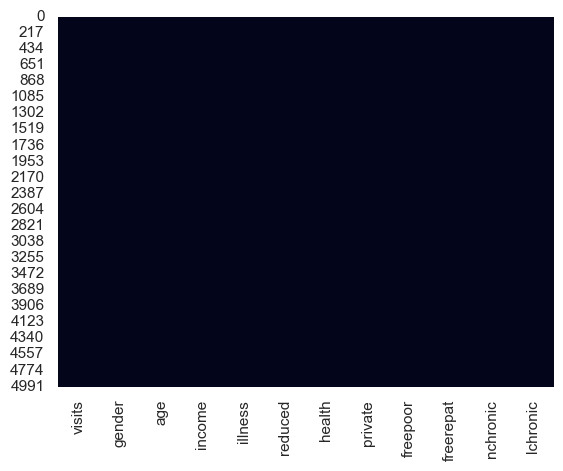

In [67]:
#lets represent the null values in heatmap using seaborn
sns.heatmap(df.isnull(),cbar = False)

### HENCE, THERE ARE NO NAN VALUES IN THE DATASET

# ANALYSIS OF DATA

### 1. THE TOTAL NUMBER OF PEOPLE BASED ON ILLNESS

In [68]:
df['illness'].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

### 2. THE NUMBER OF PEOPLE BASED ON THEIR GENDER

In [69]:
df['gender'].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

### 3. THE AGE OF PEOPLE IN YEARS DIVIDED BY 100

In [70]:
df['age'].value_counts()

0.22    1213
0.72     822
0.19     752
0.27     523
0.62     316
0.67     315
0.32     301
0.57     273
0.52     222
0.47     181
0.37     146
0.42     126
Name: age, dtype: int64

### 4. THE DAYS TAKEN FOR EACH PERSON TO REDUCE FROM THE ILLNESS

In [71]:
df['reduced'].value_counts()

0     4454
14     188
1      177
2      108
3       74
4       45
5       40
7       38
6       17
8       17
10      12
9        7
12       6
13       5
11       2
Name: reduced, dtype: int64

### 5. THE NUMBER OF DAYS TO GET REDUCE FROM ILLNESS BASED ON THE MEAN OF PEOPLE ON GENDER

In [72]:
df.groupby(['reduced','gender']).mean()

visits       age    income   illness    health
reduced gender                                                  
0       female  0.229322  0.465755  0.482735  1.462144  1.115098
        male    0.136007  0.344703  0.694398  1.099585  0.924850
1       female  0.400000  0.325684  0.542105  2.242105  1.610526
        male    0.304878  0.286220  0.676341  1.743902  1.256098
2       female  0.672727  0.391455  0.560182  2.236364  1.781818
        male    0.471698  0.343585  0.653019  2.358491  1.547170
3       female  1.333333  0.403111  0.516000  2.733333  1.733333
        male    0.724138  0.334138  0.741379  2.137931  1.689655
4       female  0.851852  0.458889  0.466667  2.222222  2.074074
        male    0.722222  0.309444  0.869444  2.055556  2.000000
5       female  1.444444  0.401667  0.614444  2.222222  2.500000
        male    1.136364  0.331818  0.570455  2.272727  2.818182
6       female  1.363636  0.426364  0.622727  2.363636  1.363636
        male    0.833333  0.340000  0.591667  2.500000  2.000000
7       female  1.384615  0.436154  0.473462  2.653846  2.230769
        male    0.750000  0.314167  0.655000  2.583333  4.333333
8       female  1.090909  0.471818  0.404545  2.181818  4.000000
        male    1.333333  0.365000  0.833333  2.666667  2.000000
9       female  0.500000  0.570000  0.825000  3.000000  1.000000
        male    2.200000  0.310000  0.392000  2.400000  2.000000
10      female  2.142857  0.512857  0.421429  2.571429  2.000000
        male    1.800000  0.480000  0.590000  2.600000  4.600000
11      male    5.000000  0.320000  1.000000  1.500000  0.500000
12      female  2.000000  0.720000  0.250000  3.500000  5.500000
        male    2.000000  0.370000  0.515000  1.500000  1.000000
13      female  4.000000  0.720000  0.300000  4.500000  3.500000
        male    4.000000  0.510000  0.350000  3.333333  2.333333
14      female  1.543103  0.551724  0.427586  2.534483  4.112069
        male    1.555556  0.476806  0.598611  2.375000  3.527778

### 6.THE NUMBER OF INDIVIDUAL HAVE PRIVATE HEALTH INSURANCE

In [73]:
df['private'].value_counts()

no     2892
yes    2298
Name: private, dtype: int64

### 7. THE NUMBER OF INDIVIDUAL HAVE SUPPORT OF GOVERNMENT

In [74]:
df['freepoor'].value_counts()

no     4968
yes     222
Name: freepoor, dtype: int64

# ANALYSIS OF DATA USING DATA VISUALIZATION

### 1. THE AVERAGE DOCTOR VISITS BASED ON THE INCOME 

c:\Users\girid\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




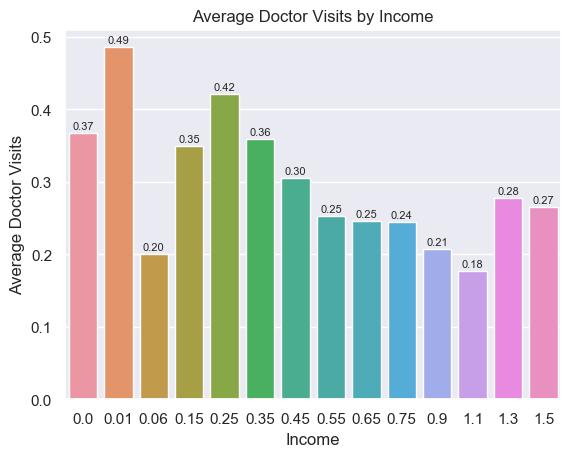

In [75]:
# Generate the bar plot
ax = sns.barplot(x='income', y='visits', data=df,ci=None)

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points', fontsize=8)

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Average Doctor Visits')
plt.title('Average Doctor Visits by Income')

# Show the plot
plt.show()

### 2. THE NUMBER OF INDIVIDUALS DOCTOR VISITED BASED ON GENDER OF PATIENTS

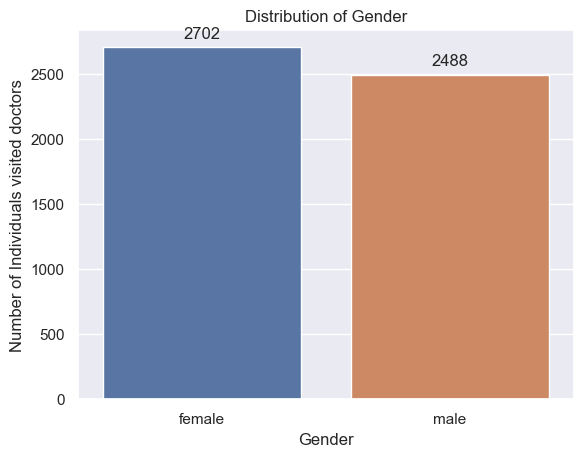

In [76]:
sns.set(style="darkgrid")

ax = sns.countplot(x='gender', data=df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10), textcoords = 'offset points', fontsize=12)

plt.xlabel('Gender')
plt.ylabel("Number of Individuals visited doctors")
plt.title('Distribution of Gender')

plt.show()

### 3.THE RELATION BETWEEN AGE AND INCOME

In [77]:


import plotly.express as px

fig = px.scatter(df, x='age', y='income', hover_data=['visits'], labels={'age': 'Age', 'income': 'Income', 'visits': 'Doctor Visits'})

fig.update_layout(
    title='Scatter Plot of Age and Income',
    xaxis_title='Age',
    yaxis_title='Income'
)

fig.show()

### 4.THE COUNT OF PRIVATE HEALTH INSURANCE BASEDON GENDER

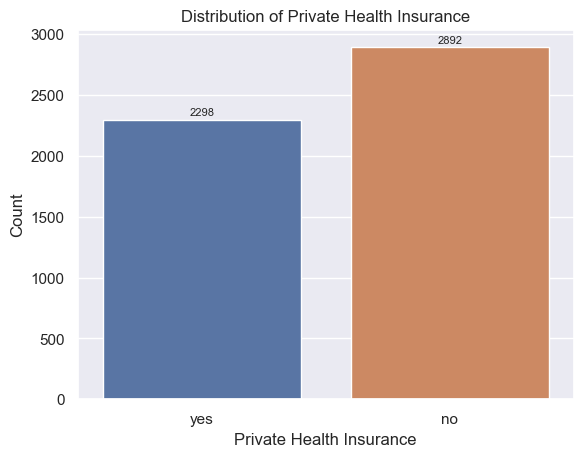

In [78]:
# Generate the bar plot
ax = sns.countplot(x='private', data=df)

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points', fontsize=8)

# Set labels and title
plt.xlabel('Private Health Insurance')
plt.ylabel('Count')
plt.title('Distribution of Private Health Insurance')

# Show the plot
plt.show()

### 5.THE COUNT OF AGE ON HISTORGRAM PLOT

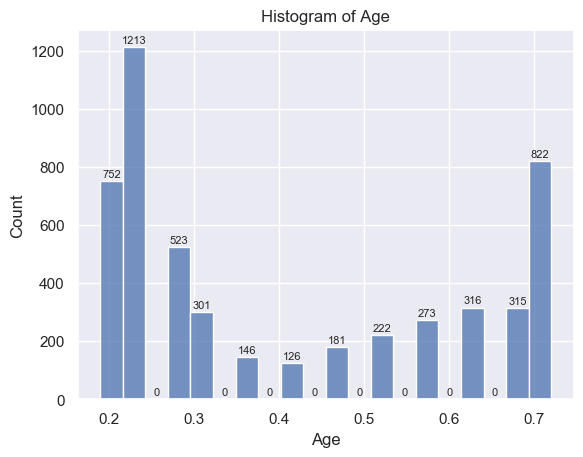

In [79]:


import pandas as pd
ax = sns.histplot(data=df, x='age', bins=20)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

plt.show()

### 6. THE DISTRIBUTION OF FREE GOVERNMENT HEALTH INSURANCE

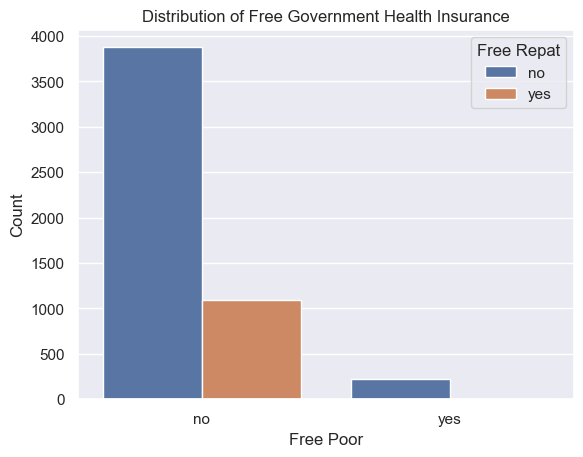

In [80]:
sns.countplot(x='freepoor', hue='freerepat', data=df)
plt.xlabel('Free Poor')
plt.ylabel('Count')
plt.title('Distribution of Free Government Health Insurance')
plt.legend(title='Free Repat', loc='upper right')
plt.show()

### 7. THE REDUCED DAYS OF ACTIVITY DUE TO ILLNESS BASEDON GENDER

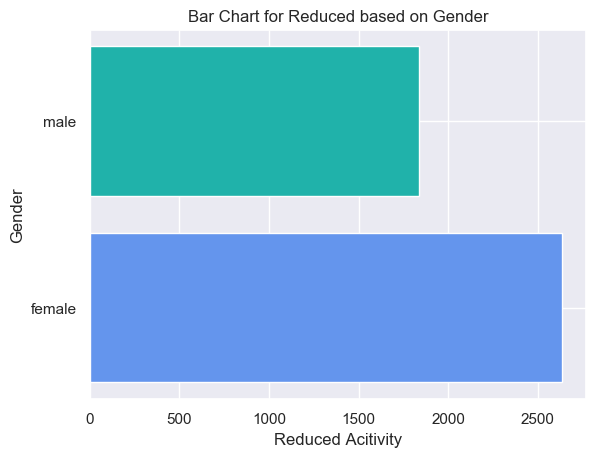

In [81]:
db = df.groupby('gender')['reduced'].sum().to_frame().reset_index()
plt.barh(db['gender'],db['reduced'],color = ['cornflowerblue','lightseagreen'])
plt.title('Bar Chart for Reduced based on Gender')
plt.xlabel("Reduced Acitivity")
plt.ylabel("Gender")
plt.show()

### 8.THE PERCENTAGE OF PEOPLE WHO ARE GETTING GOVT HEALTH INSURANCE, AND WHO HAVE PRIVAT HEALTH INSURANCE

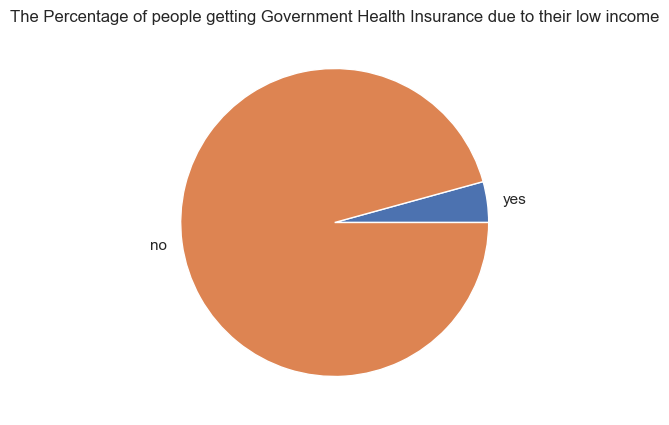

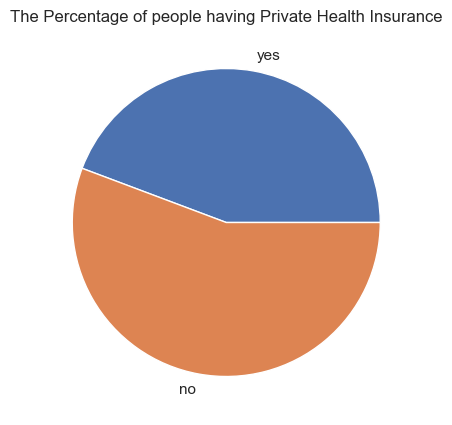

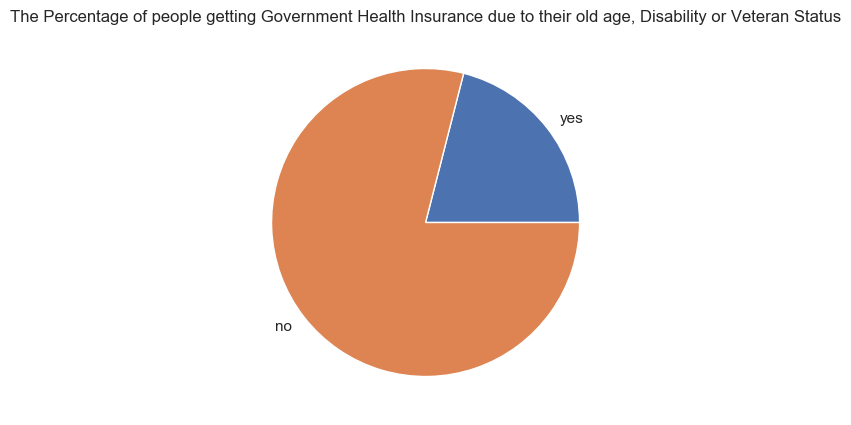

In [82]:
label = ['yes','no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize = (5,5))
plt.pie(x,labels=label)
plt.title('The Percentage of people getting Government Health Insurance due to their low income')
plt.show()
label = ['yes','no']
Y = df[df['private']=='yes']
N = df[df['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize = (5,5))
plt.pie(x,labels = label)
plt.title('The Percentage of people having Private Health Insurance')
plt.show()
label = ['yes','no']
Y = df[df['freerepat']=='yes']
N = df[df['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize = (5,5))
plt.pie(x,labels = label)
plt.title('The Percentage of people getting Government Health Insurance due to their old age, Disability or Veteran Status')
plt.show()

### 9.THE INCOME FOR THE HOSPITAL 

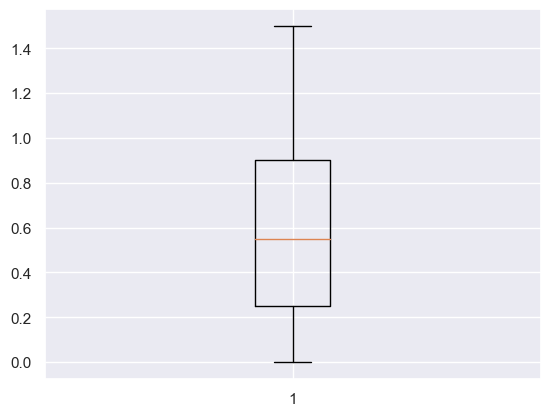

In [83]:
y = list(df.income)
plt.boxplot(y)
plt.show()

# CORRELATION MATRIX

In [84]:
df.corr()

,visits,age,income,illness,reduced,health
visits,1.000000,0.124537,-0.076840,0.223552,0.418954,0.193272
age,0.124537,1.000000,-0.271073,0.204984,0.094745,0.018616
income,-0.076840,-0.271073,1.000000,-0.148812,-0.047545,-0.085790
illness,0.223552,0.204984,-0.148812,1.000000,0.218116,0.360110
reduced,0.418954,0.094745,-0.047545,0.218116,1.000000,0.280208
health,0.193272,0.018616,-0.085790,0.360110,0.280208,1.000000


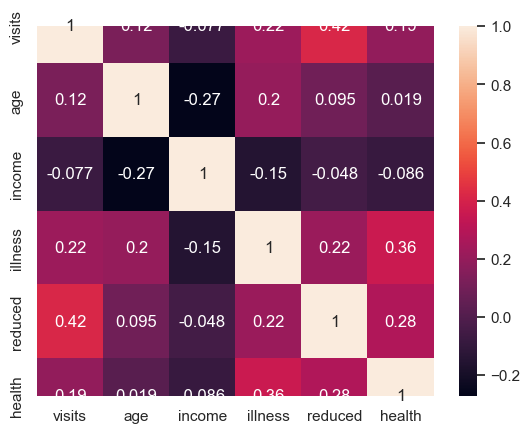

In [85]:
sns.heatmap(df.corr(),annot = True)

# THE FINAL INSIGHTS FROM THE DATASET

1. There Are 2702 Females Who Are Suffering With Their Own Illness When Compared To 2488 Males Which Means That Females Are Suffering More Than Males
2. The 22 Aged People Are The Highest Count With 1213 Who Visited The Hospital
3. There Are Only 222 Number Of People Who Have Govt Health Insurance
4. Females Got Reduced From The Illness Fastly Than The Males
5. The Percentage Of People Who Get Govt Health Insurance Due To Their Old Age,Disability Or Veteran Status Are Less Than 25% From The Overall People
6. The Hospital Gets Minimum Income Of 0.2, Median Of 0.5 And Maximum Of 1.4 In Dollars
